
<br>
    The objective of this exercice is to analyse the control of the autonomic<br>
    nervous system at rest and after alcool consumption using breathing, mean<br>
    blood pressure and interbeat signals.<br>


In [1]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp
import m03_ex2_ext as my_plot

Load signals of a subject at rest.

In [2]:
x = np.genfromtxt('heart_1.dat', delimiter='  ').T
x = {'rr':x[0], 'bp':x[1], 'resp':x[2]}
# Load signals of a subject after alcool consumption.
y = np.genfromtxt('heart_2.dat', delimiter='  ').T
y = {'rr':y[0], 'bp':y[1], 'resp':y[2]}
# Signals are sampled at 4 Hz.
fs = 4
# Generate the time for the recordings.
t = np.arange(len(x['rr']))/fs


<br>
    Cardiac interbeats, mean blood pressure and respiration volume of a subject<br>
    at rest.<br>
    Q: Comment the different signals and their realtionships.<br>
    Q: Which signals are related and how?<br>


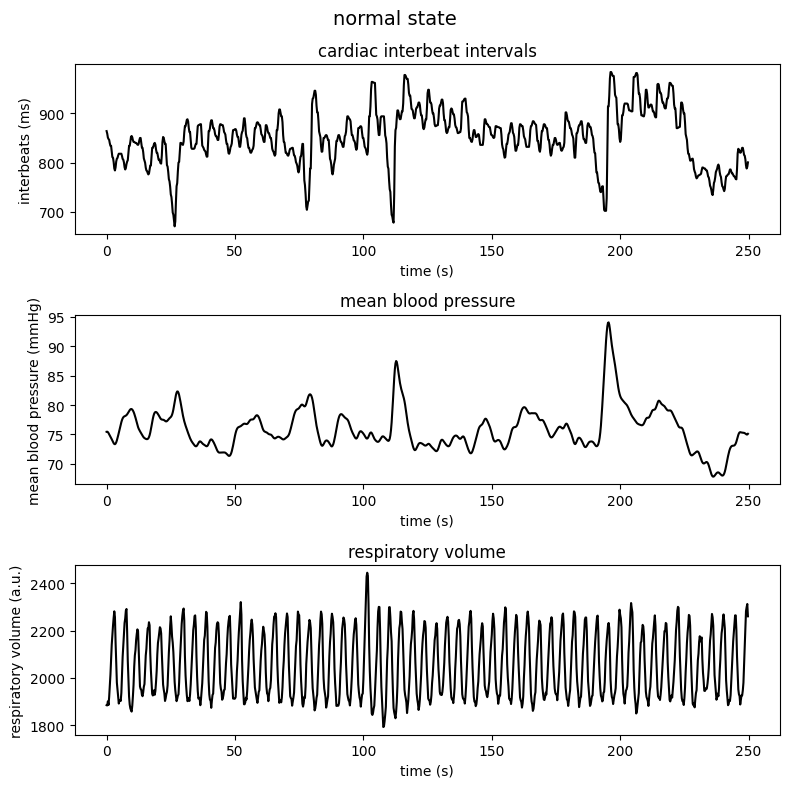

In [3]:
my_plot.plot_time(x, t, 'normal state')

### Answer

The three signals have different characteristics. First, the *respiratory volume* is close to a sinusoidal and is therefore the most deterministic signal between the three. Secondly, the *mean blood pressure* is almost a pure stochastic signal. Finally, the *cardiac interbeat intervals* is between the two other signals in term of determinism.

Concerning the relationships between signals, several conclusions can be drawn.
From the graph above, *cardiac interbeat intervals* and *mean blood pressure* can be related, as we can see a corresponding peak in the two signals. Respectively, a minimum peak in *cardiac interbeat intervals* corresponds to a maximum peak in *mean blood pressure*. Finally, it is difficult to draw conclusion about correlation between *respiratory volume* and the other signals.


<br>
    Cardiac interbeats, mean blood pressure and respiration volume of a subject<br>
    after alcool consumption.<br>
    Q: Comment the different signals and their realtionships.<br>
    Q: Which signals are related and how?<br>
    Q: What are the differences with rest recording of previous figure?<br>


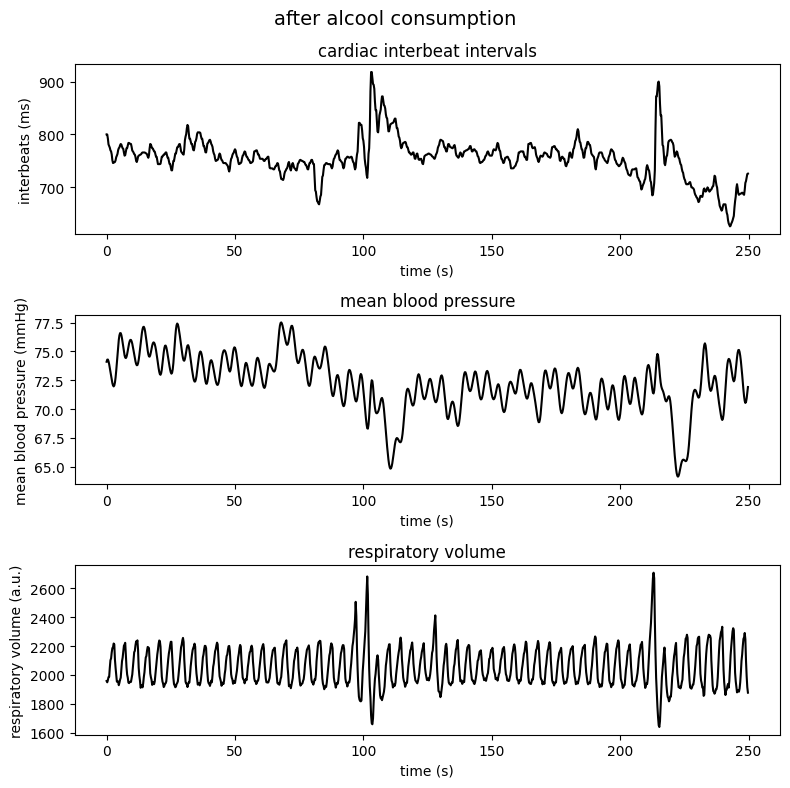

In [4]:
my_plot.plot_time(y, t, 'after alcool consumption')

### Answer
* Strong 0.2 Hz sinusoidal component in the mean blood pressure. Respiratory volume features large spikes in addition to its 0.2 Hz frequency. Although this frequency is less visible in cardiac interbeat intervals, it is still distinguishable.
* Mean blood pressure and cardiac interbeat intervals are still related as in the previous plot. Additionally, there seems to be a correlation between these spikes and spikes in respiratory volume.
* Compared to the previous plot, the overall mean blood pressure and cardiac interbeat intervals are lower, spikes in respiratory volume are larger and 0.2 Hz fluctuations in mean blood pressure appear.
* The interbeat intervals seem more stable overall but exhibit pronounced peaks (around 100s and 200s), indicating irregularities in heart rhythm


 <br>
    Compute the intercorrelation of the signals of the subject at rest.<br>
    Q: Comment the oscillation present in the different signals.<br>
    Q: Which signals are related and how.<br>


In [5]:
def my_corr(x):
    rxx = np.correlate(x-np.mean(x), x-np.mean(x), mode='full')/len(x)
    return rxx

In [6]:
x['rxx_rr'] = my_corr(x['rr'])
x['rxx_bp'] = my_corr(x['bp'])
x['rxx_resp'] = my_corr(x['resp'])

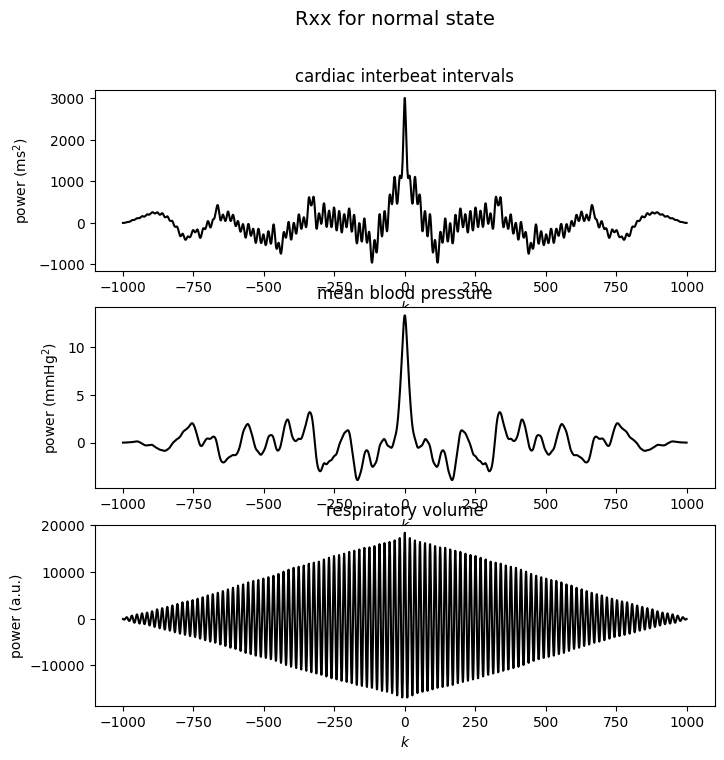

In [7]:
my_plot.plot_rxx(x, 'Rxx for normal state')

## Answer

The autocorrelation is used to compare the signal with a delayed version of itself and show us how similar they are. If signal is periodic, we will see more peaks in the plot.

For the *Cardiac interbeat*, we have a big peak at 𝑘 = 0 and a signal that decreases but with a lot of oscillations, which indicates a repeating pattern in the *Cardiac interbeat*.
For the Mean Blood Pressure, we also have a big peak at 𝑘 = 0, but we have almost no oscillations, which means there are fluctuations in blood pressure.
As for the Respiratory Volume, we have really big peaks in the middle, decreasing with 𝑘 but staying big for a long time. This indicates very distinct peaks and regular oscillation, meaning we have a really periodic rhythm.

We can clearly see the relationship between *Cardiac interbeat* and Blood Pressure, as both have a big peak at 𝑘 = 0, meaning that heart rate is related to blood pressure. This confirms what we saw in the previous questions, where an increase in blood pressure leads to a decrease in heart rate.
The relationship between Respiratory Volume and the other two signals is more complicated to observe directly from the graph, although there is a theoretical relationship.


 <br>
    Compute the intercorrelation of the signals of the subject after alcool<br>
    consumption.<br>
    Q: Comment the oscillation present in the different signals.<br>
    Q: Which signals are related and how.<br>
    Q: What difference do you observe with the previous figure?<br>


In [8]:
y['rxx_rr'] = my_corr(y['rr'])
y['rxx_bp'] = my_corr(y['bp'])
y['rxx_resp'] = my_corr(y['resp'])

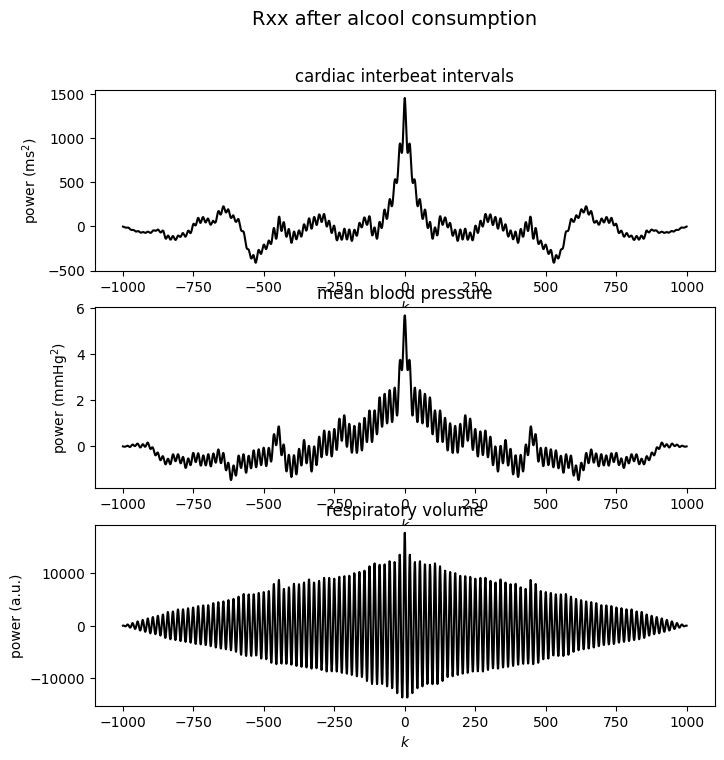

In [9]:
my_plot.plot_rxx(y, 'Rxx after alcool consumption')

## Answer 

We see that with alcohol, for the cardiac interbeat, we still have the peak at 
𝑘=0, but the oscillations are reduced. This means there is a reduction in the signal’s periodicity. With the mean blood pressure, we observe the opposite effect: the peak at 𝑘=0 remains, but the oscillations increase, indicating an increase in the signal’s periodicity. 

Additionally, the autocorrelation is clearly less smooth, meaning there are more random fluctuations.

The respiratory volume is still periodic but more irregular than before, without alcohol.

As before, the cardiac interbeat and mean blood pressure are related, though the relationship is less pronounced than in the previous case. The relationship between respiration and the other signals remains difficult to distinguish.


 <br>
    Compute the PSD of the signal for the subject at rest.<br>
    Q: How the different peaks are related to the control of the autonomic<br>
        nervous system?<br>
    Q: Do the positions and amplitude of the peaks confirm you previous<br>
        findings;<br>


In [10]:
def my_psd(x, half_win=250):
    interval = np.arange(-half_win,half_win+1)+len(x)//2
    x_sub = x[interval]
    psd = np.abs(np.fft.fft(sp.windows.hann(len(interval))*x_sub, 2048))
    return psd

In [11]:
x['RR'] = my_psd(x['rxx_rr'])
x['BP'] = my_psd(x['rxx_bp'])
x['RESP'] = my_psd(x['rxx_resp'])

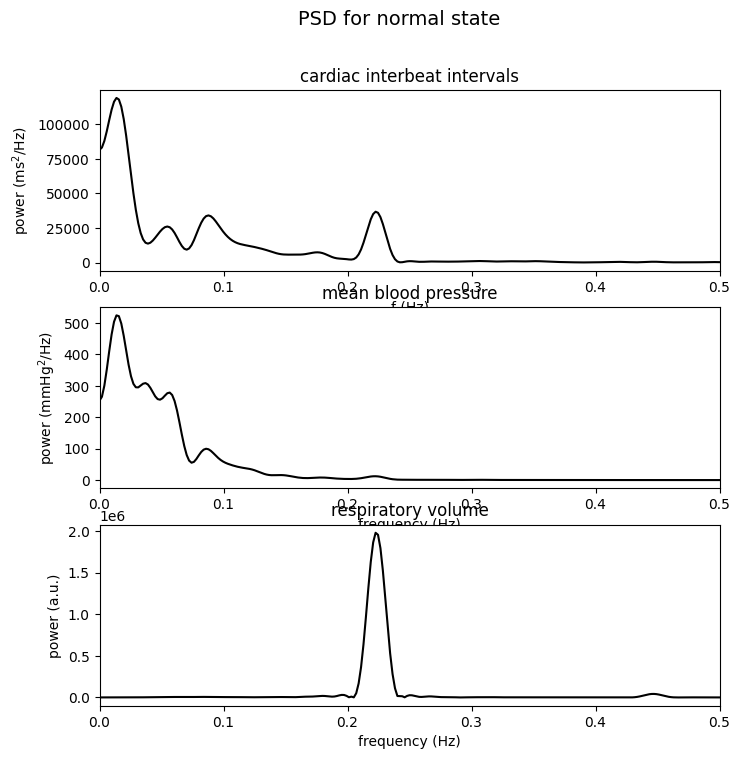

In [12]:
my_plot.plot_X(x, fs, 'PSD for normal state')

# Answer
* Peaks in the 0.2–0.4 Hz range reflect the parasympathetic control of heart rate through respiratory influences, especially visible in cardiac interbeat intervals and slightly in mean blood pressure. Peaks in the 0.05–0.2 Hz range show the balance of sympathetic and parasympathetic control, relating to both heart rate variability and blood pressure regulation. Very low-frequency peaks highlight the slower physiological processes managed primarily by the sympathetic nervous system, which may contribute to fluctuations in both mean blood pressure and cardiac interbeat intervals.

* The frequency peak slightly above 0.2 Hz is clear for the cardiac interbeat intervals and respiratory volume signals, as observed before.
 
* The strong peak in respiration confirms the periodicity and regularity of respiration.

* We see the relationship highlighted in previous points between the cardiac interbeat and mean blood pressure, with slightly similar peaks in the 0–0.2 Hz range.


 <br>
    Compute the PSD of the signal for the subject after alcool consumption.<br>
    Q: How the different peaks are related to the control of the autonomic<br>
        nervous system?<br>
    Q: Do the positions and amplitude of the peaks confirm you previous<br>
        findings;<br>


In [13]:
y['RR'] = my_psd(y['rxx_rr'])
y['BP'] = my_psd(y['rxx_bp'])
y['RESP'] = my_psd(y['rxx_resp'])

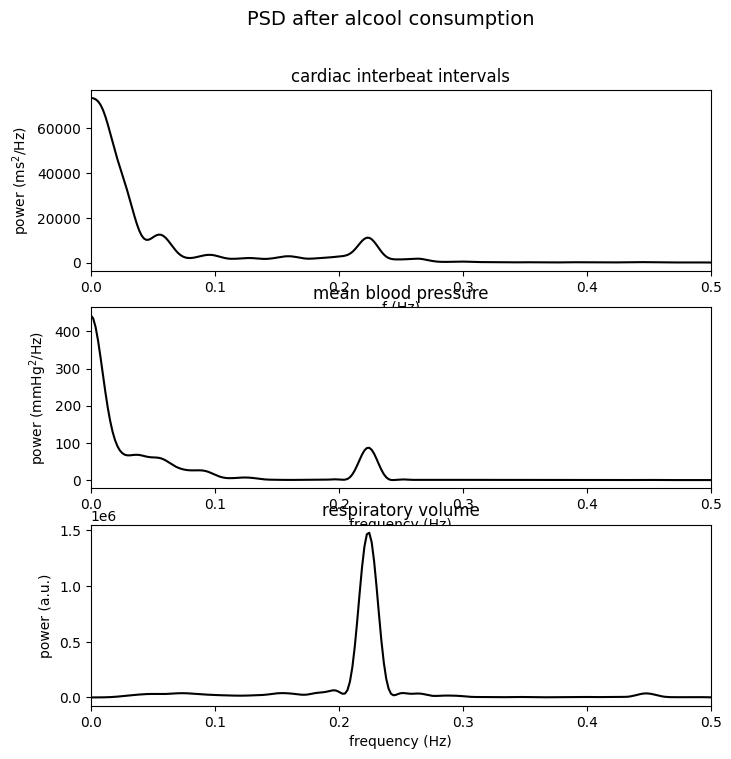

In [14]:
my_plot.plot_X(y, fs, 'PSD after alcool consumption')

# Answer
* With alcohol consumption, the peaks in the 0.2–0.4 Hz range still reflect parasympathetic control of heart rate through respiratory influences, but the effects are less pronounced compared to the resting state for the cardiac interbeat intervals, while being more pronounced in mean blood pressure.

* The peaks in the 0.05–0.2 Hz range continue to indicate the balance of sympathetic and parasympathetic control, but there is a reduction in their relative amplitudes, suggesting altered heart rate variability and blood pressure regulation due to alcohol.

* Very low-frequency peaks still highlight slower physiological processes managed primarily by the sympathetic nervous system; however, the influence of alcohol introduces fewer variations in frequency and a smoother range of frequencies.

* The frequency peak slightly above 0.2 Hz is still evident for the cardiac interbeat intervals and respiratory volume signals, though the overall amplitude is reduced compared to the resting state. On the other hand, the peak in mean blood pressure has considerably increased.

* The strong peak in respiration remains, confirming the periodicity and regularity of respiration, but it may also show irregularities compared to the baseline measurements.

* The relationship between the cardiac interbeat intervals and mean blood pressure persists, but the peaks in the 0–0.2 Hz range show altered amplitudes, indicating a slightly changed interaction between these signals under the influence of alcohol.

* All three signals indeed now have a dominant frequency close to 0.2 Hz, as observed before.


<br>
    Plot the PSDs of the signals for the two conditions.<br>
    Q: Discuss the differences.<br>


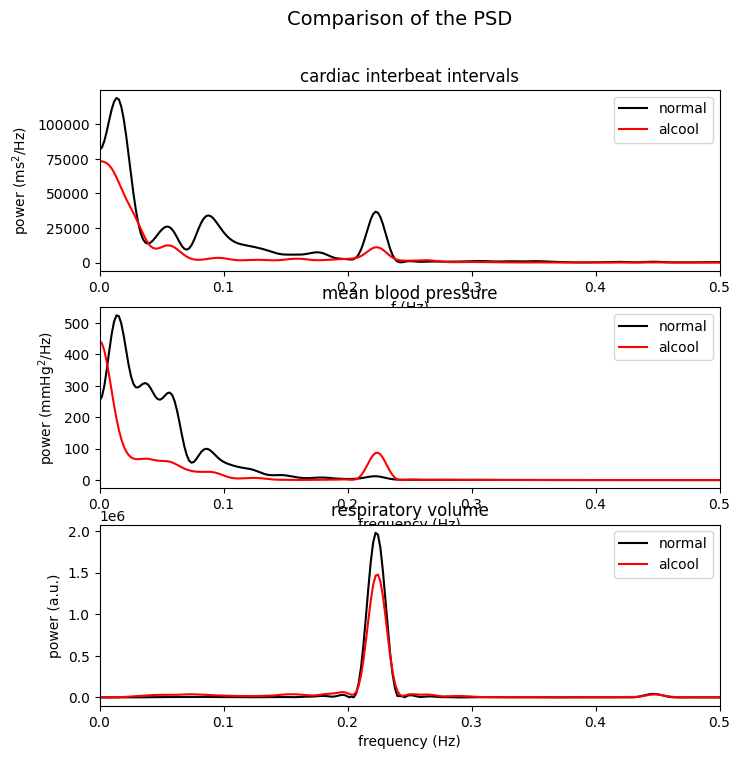

In [15]:
my_plot.plot_XY(x, y, fs, 'Comparison of the PSD')

# Answer
* The peak in frequency around 0.2 Hz in the mean blood pressure, barely visible in normal state, substantially grows with alcohol consumption. For the cardiac interbeat intervals and respiratory volume, this peak is reduced.